In [104]:
import numpy as np
import matplotlib.pyplot as plt

def solve_dirichlet(alpha, N, phi1, phi2, f, u):
    ts = [i/N for i in range(N+1)]
    x1s = [phi1(ts[i]) for i in range(N+1)]
    x2s = [phi2(ts[i]) for i in range(N+1)]
    us = [i for i in range(N+1)]

    t1 = 1/2 - 1 / np.sqrt(12)
    t2 = 1/2 + 1 / np.sqrt(12)
    
    def p(x):
        if x < 1/2:
            return 1
        else:
            return alpha 
    
    def compute_A(i,j):
        x1_norm = np.sqrt((x1s[i] - x1s[i-1]) ** 2 + (x2s[i] - x2s[i-1]) ** 2)
        x2_norm = np.sqrt((x1s[i+1] - x1s[i]) ** 2 + (x2s[i+1] - x2s[i]) ** 2)

        if i == j-1:
            return -1 / x1_norm
        elif i == j+1:
            return -1 / x2_norm
        elif i == j:
            return 1 / x1_norm + 1 / x2_norm
        else:
            return 0

    def compute_F(i):
        x1_norm = np.sqrt((x1s[i] - x1s[i-1]) ** 2 + (x2s[i] - x2s[i-1]) ** 2)
        x2_norm = np.sqrt((x1s[i+1] - x1s[i]) ** 2 + (x2s[i+1] - x2s[i]) ** 2)

        phi1_K1 = [phi1(ts[i-1] + t1 * (ts[i] - ts[i-1])), phi2(ts[i-1] + t1 * (ts[i] - ts[i-1]))]
        phi2_K1 = [phi1(ts[i-1] + t2 * (ts[i] - ts[i-1])), phi2(ts[i-1] + t2 * (ts[i] - ts[i-1]))]

        phi1_K2 = [phi1(ts[i] + t1 * (ts[i+1] - ts[i])), phi2(ts[i] + t1 * (ts[i+1] - ts[i]))]
        phi2_K2 = [phi1(ts[i] + t2 * (ts[i+1] - ts[i])), phi2(ts[i] + t2 * (ts[i+1] - ts[i]))]

        K1 = 1/2 * f(phi1_K1) * t1 * x1_norm + 1/2 * f(phi2_K1) * t2 * x1_norm

        K2 = 1/2 * f(phi1_K2) * (1 - t1) * x2_norm + 1/2 * f(phi2_K2) * (1 - t2) * x2_norm

        return K1 + K2
        
    A = np.zeros((N+1,N+1))
    F = np.zeros(N+1)
    
    for i in range(1,N):
        F[i] = compute_F(i)
        for j in [i-1,i,i+1]:
            A[i,j] = compute_A(i,j)
    # print(A)

    # dirichlet boundary conditions
    A[0,0] = 1
    F[0] = 0
    A[-1,-1] = 1
    F[-1] = 0

    def L2_norm_sq(i):
        x1_norm = np.sqrt((x1s[i] - x1s[i-1]) ** 2 + (x2s[i] - x2s[i-1]) ** 2)

        phi1_vec = [phi1(ts[i-1] + t1 * (ts[i] - ts[i-1])), phi2(ts[i-1] + t1 * (ts[i] - ts[i-1]))]
        phi2_vec = [phi1(ts[i-1] + t2 * (ts[i] - ts[i-1])), phi2(ts[i-1] + t2 * (ts[i] - ts[i-1]))]

        g1 = (u(phi1_vec) - us[i-1] * (1-t1) - us[i] * t1) ** 2
        g2 = (u(phi2_vec) - us[i-1] * (1-t2) - us[i] * t2) ** 2

        return (1/2 * g1 + 1/2 * g2) * x1_norm
    
    L2_norm_sum = 0
    for i in range(1,N):
        L2_norm_sum += L2_norm_sq(i)
    L2_norm = np.sqrt(L2_norm_sum)
    print(f'L2 Norm: {L2_norm}')


    def H1_norm_sq(i):
        x1_diff = (x1s[i] - x1s[i-1]) ** 2 + (x2s[i] - x2s[i-1]) ** 2
        ci = (us[i] - us[i-1]) / x1_diff * ((x1s[i] - x1s[i-1]) + (x2s[i] - x2s[i-1]))

        # m is computed by hand. Everytime you change phi and u, change m according to the formula
        m = 2 * np.pi * np.cos(2 * np.pi * ts[i]) * 1
        
        g1 = (m * (ts[i-1]) + t1 * (ts[i] - ts[i-1]) - ci) ** 2
        g2 = (m * (ts[i-1]) + t2 * (ts[i] - ts[i-1]) - ci) ** 2
        g = np.sqrt(g1 ** 2 + g2 ** 2)

        return 1/2 * g * np.sqrt(x1_diff)
    
    H1_norm_sum = 0
    for i in range(1,N):
        H1_norm_sum += H1_norm_sq(i)
    H1_norm = np.sqrt(H1_norm_sum)
    print(f'H1_norm: {H1_norm}')
    
    return ts, np.linalg.solve(A,F)

L2 Norm: 57.154165052843744
H1_norm: 83.71717723214414


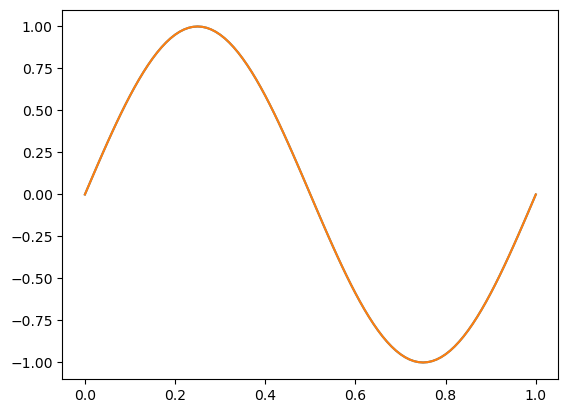

In [105]:
def test_dirichlet():
    alpha = 1
    N = 100

    def phi1(t):
        return t
    def phi2(t):
        return 0
    def f(x): # x is a vector
        return 4 * np.pi ** 2 * np.sin(2 * np.pi * x[0])
    def u(x):
        return np.sin(2 * np.pi * x[0])
    
    ts, us = solve_dirichlet(alpha, N, phi1, phi2, f, u)
    plt.plot(ts, us)
    plt.plot(ts, [np.sin(2 * np.pi * ts[i]) for i in range(0, N+1)])

test_dirichlet()